In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

In [4]:
# Your file location here.
INP_concentrations = pd.read_csv('/home/users/erinraif/mphase_data/inp_data/mphase_ER_CAOs.csv', index_col='temp_bin')

In [5]:
def four_param_fit(T, ln_N0, T_max, a, b):
    return ln_N0 + a*(T_max-T)**b

In [6]:
# Your parametrisation location here.
param = pd.read_csv('/home/users/erinraif/mphase_data/metadata/parametrisations.csv', index_col='unique_ID')

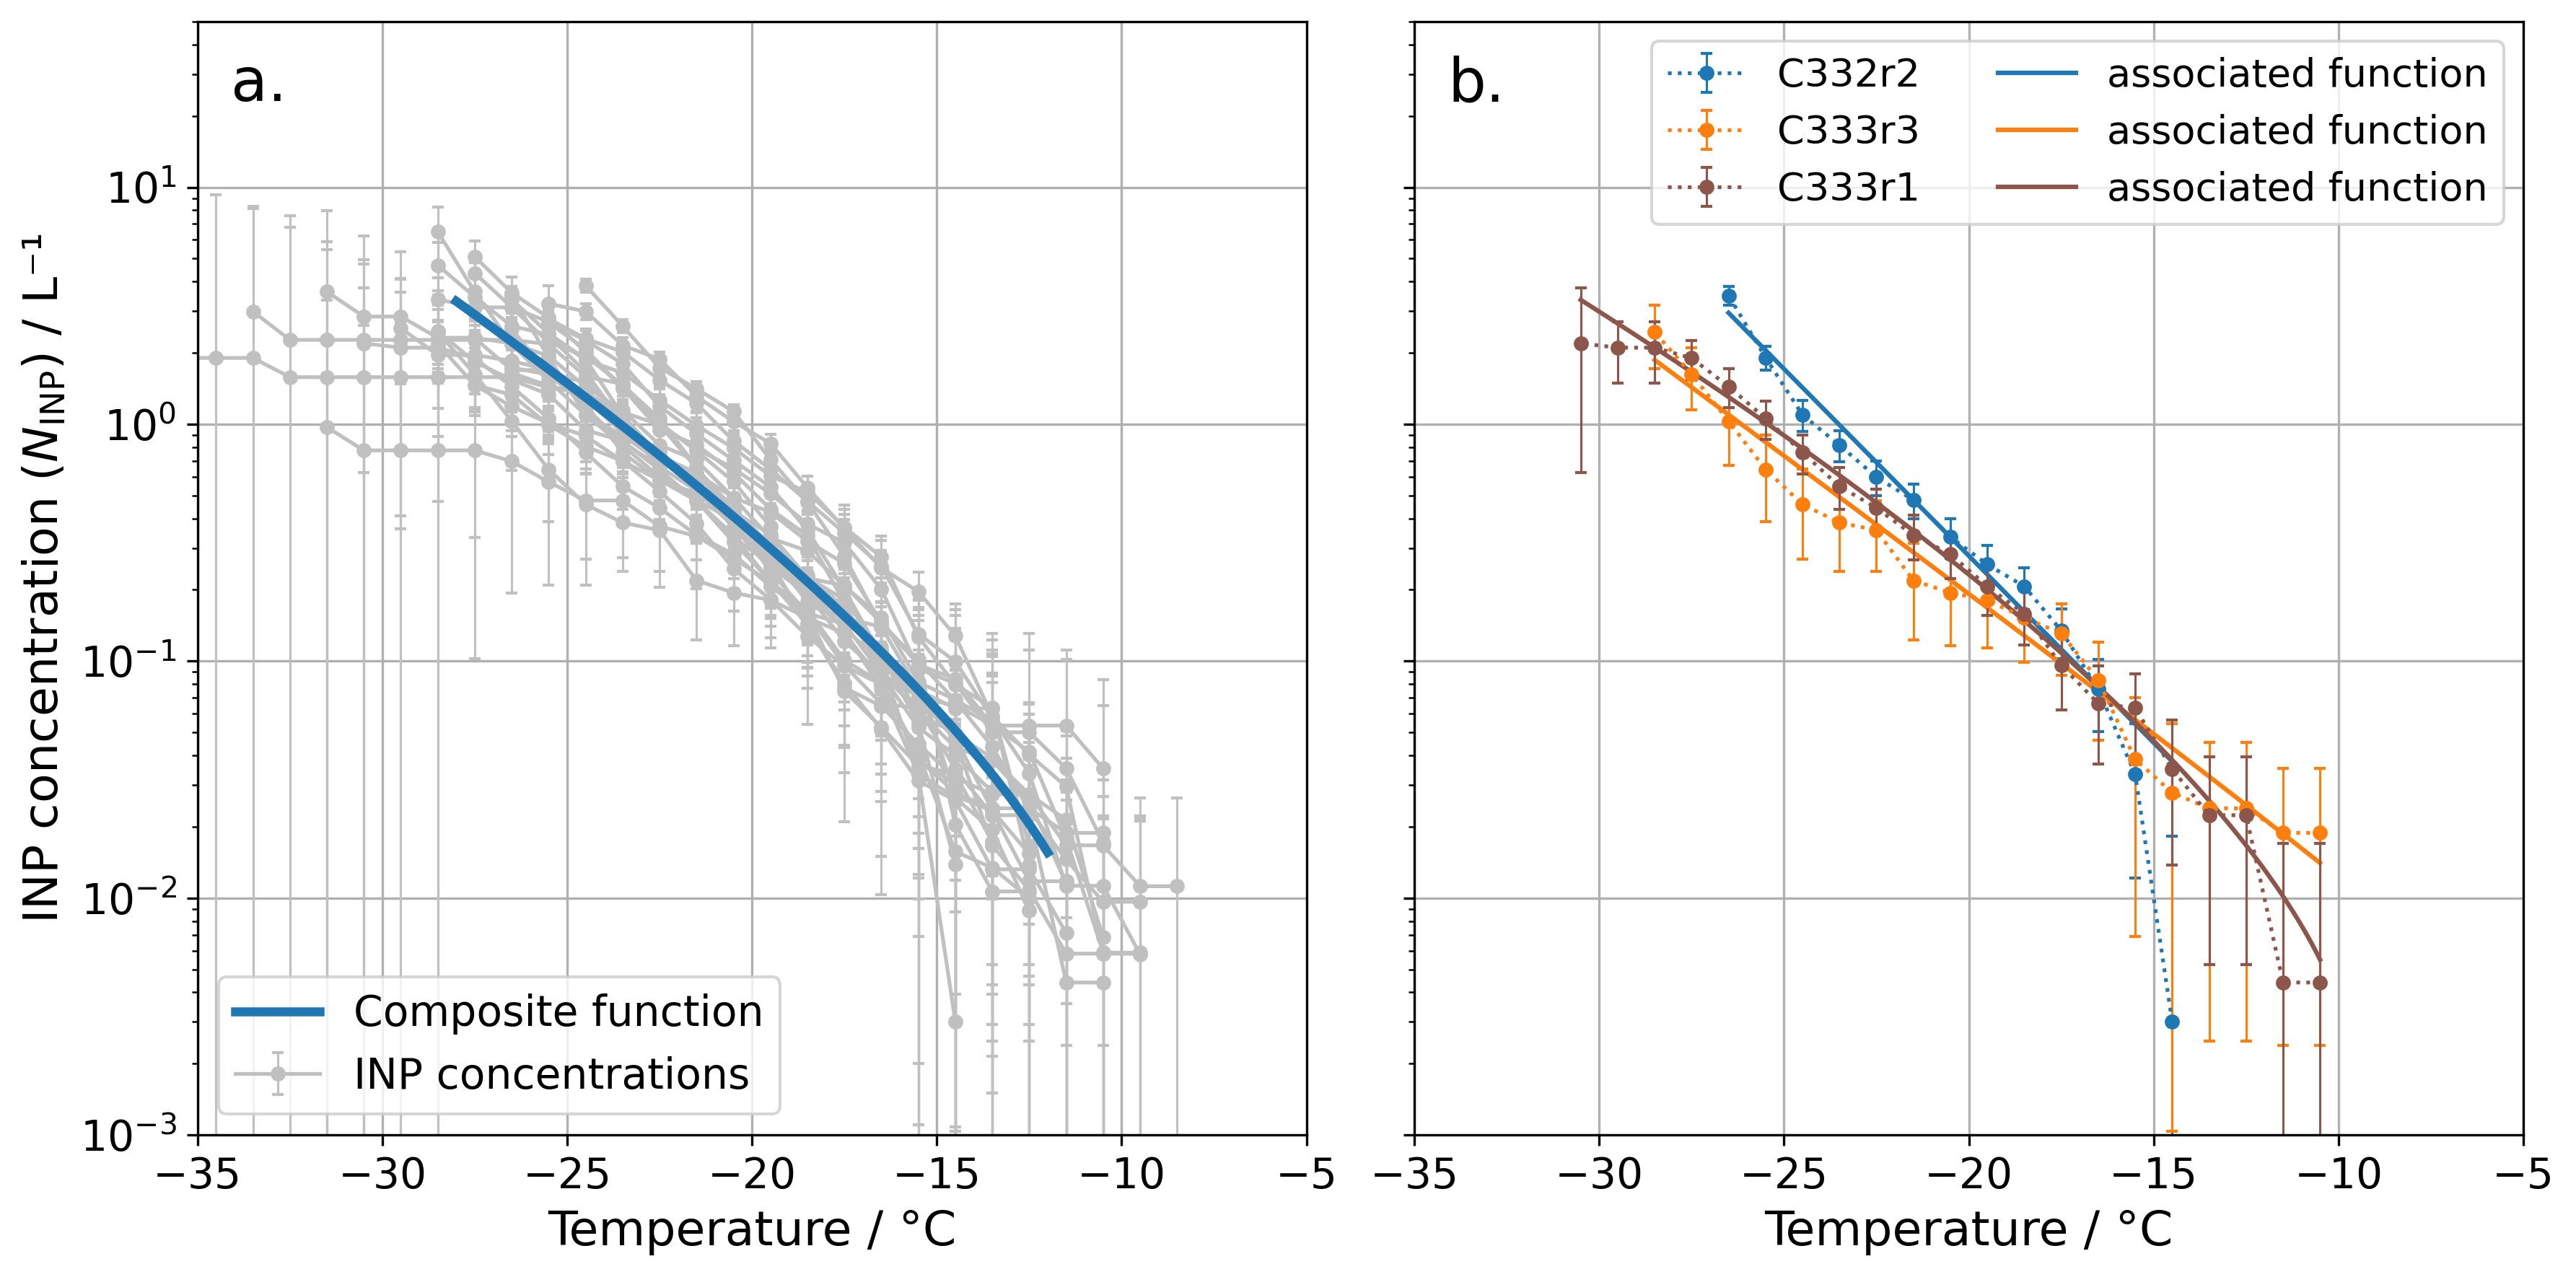

In [10]:
fig, (ax1,ax2) = plt.subplots(ncols=2,nrows=1,figsize=(12,6),
                              dpi=300, # set quality
                              sharey=True) # share y axis values
for ax in (ax1, ax2):
    # set up each axis
    ax.set_xlim(-35,-5)
    ax.set_ylim(0.001,50)
    ax.set_yscale('log')
    ax.grid(zorder=1)
    ax.set_xlabel('Temperature / °C', size=16)
    ax.tick_params(axis='x', labelsize=14) 
    ax.tick_params(axis='y', labelsize=14)
ax1.set_ylabel(r'INP concentration ($N_\mathrm{INP}$) / L⁻¹', size=16)

# Loop through concentrations and ensure that there is a different style for
# each of the filter measurements.
first = True
T = np.linspace(-12,-28,1000)
pred = np.exp(four_param_fit(T, -4.990412,  -11.0, 0.82858,  0.709482))
# plot all the INP concentrations
for col in [col for col in INP_concentrations.columns if col.endswith('NT')]:
    y = INP_concentrations[col]
    y_err = INP_concentrations[col[:-2] + 'err']
    if first == True:
        # add label to the first one
        first = False
        ax1.errorbar(y.dropna().index, y.dropna(), y_err.dropna(), marker='o',
                    linestyle='-', markersize=4, capsize=2, elinewidth=0.75,
                    linewidth=1.25, color='silver',
                    label = 'INP concentrations'
                   )
    else:
        ax1.errorbar(y.dropna().index, y.dropna(), y_err.dropna(), marker='o',
            linestyle='-', markersize=4, capsize=2, elinewidth=0.75,
            linewidth=1.25, color='silver',zorder=2
           )
ax1.plot(T,pred,zorder=3,linewidth=3, label='Composite function')
left_legend = ax1.legend(loc='lower left', fontsize=14)

# Make these lists as long/short as you want but make sure the number of
# items in each is the same. Item 1 will have colour 1, etc.
particular_runs = ['C332r2t','C333r3t','C333r1t']
colours = ['tab:blue','tab:orange','tab:brown']
for run, colour in zip(particular_runs, colours):
    y = INP_concentrations[run+'_NT']
    y_err = INP_concentrations[run+ '_err']
    T = np.linspace(y.dropna().index.max(), y.dropna().index.min(),1000)
    ax2.errorbar(y.dropna().index, y.dropna(), y_err.dropna(), marker='o',
                    linestyle='dotted', markersize=4,
                    capsize=2, elinewidth=0.75, linewidth=1.25,
                    label = run[:-1],color=colour
                   )
    run_nu = param.loc[run]['nu_n_INP']
    run_T_max = param.loc[run]['T_max_n_INP']
    run_a = param.loc[run]['a_n_INP']
    run_b = param.loc[run]['b_n_INP']
    run_pred = np.exp(four_param_fit(T,run_nu,run_T_max,run_a,run_b))
    ax2.plot(T, run_pred, label='associated function',color=colour)
    
    
right_legend = ax2.legend(loc='lower left', fontsize=14,ncol=2)

handles, labels = ax2.get_legend_handles_labels()
order = [3,4,5,0,1,2]
ax2.legend([handles[idx] for idx in order],[labels[idx] for idx in order],ncol=2,
           fontsize=13)

ax1.text(0.03, 0.97, 'a.', ha='left', va='top', fontsize=20,
           transform=ax1.transAxes)
ax2.text(0.03, 0.97, 'b.', ha='left', va='top', fontsize=20,
           transform=ax2.transAxes)

fig.tight_layout()
# fig.savefig('your_location.png')


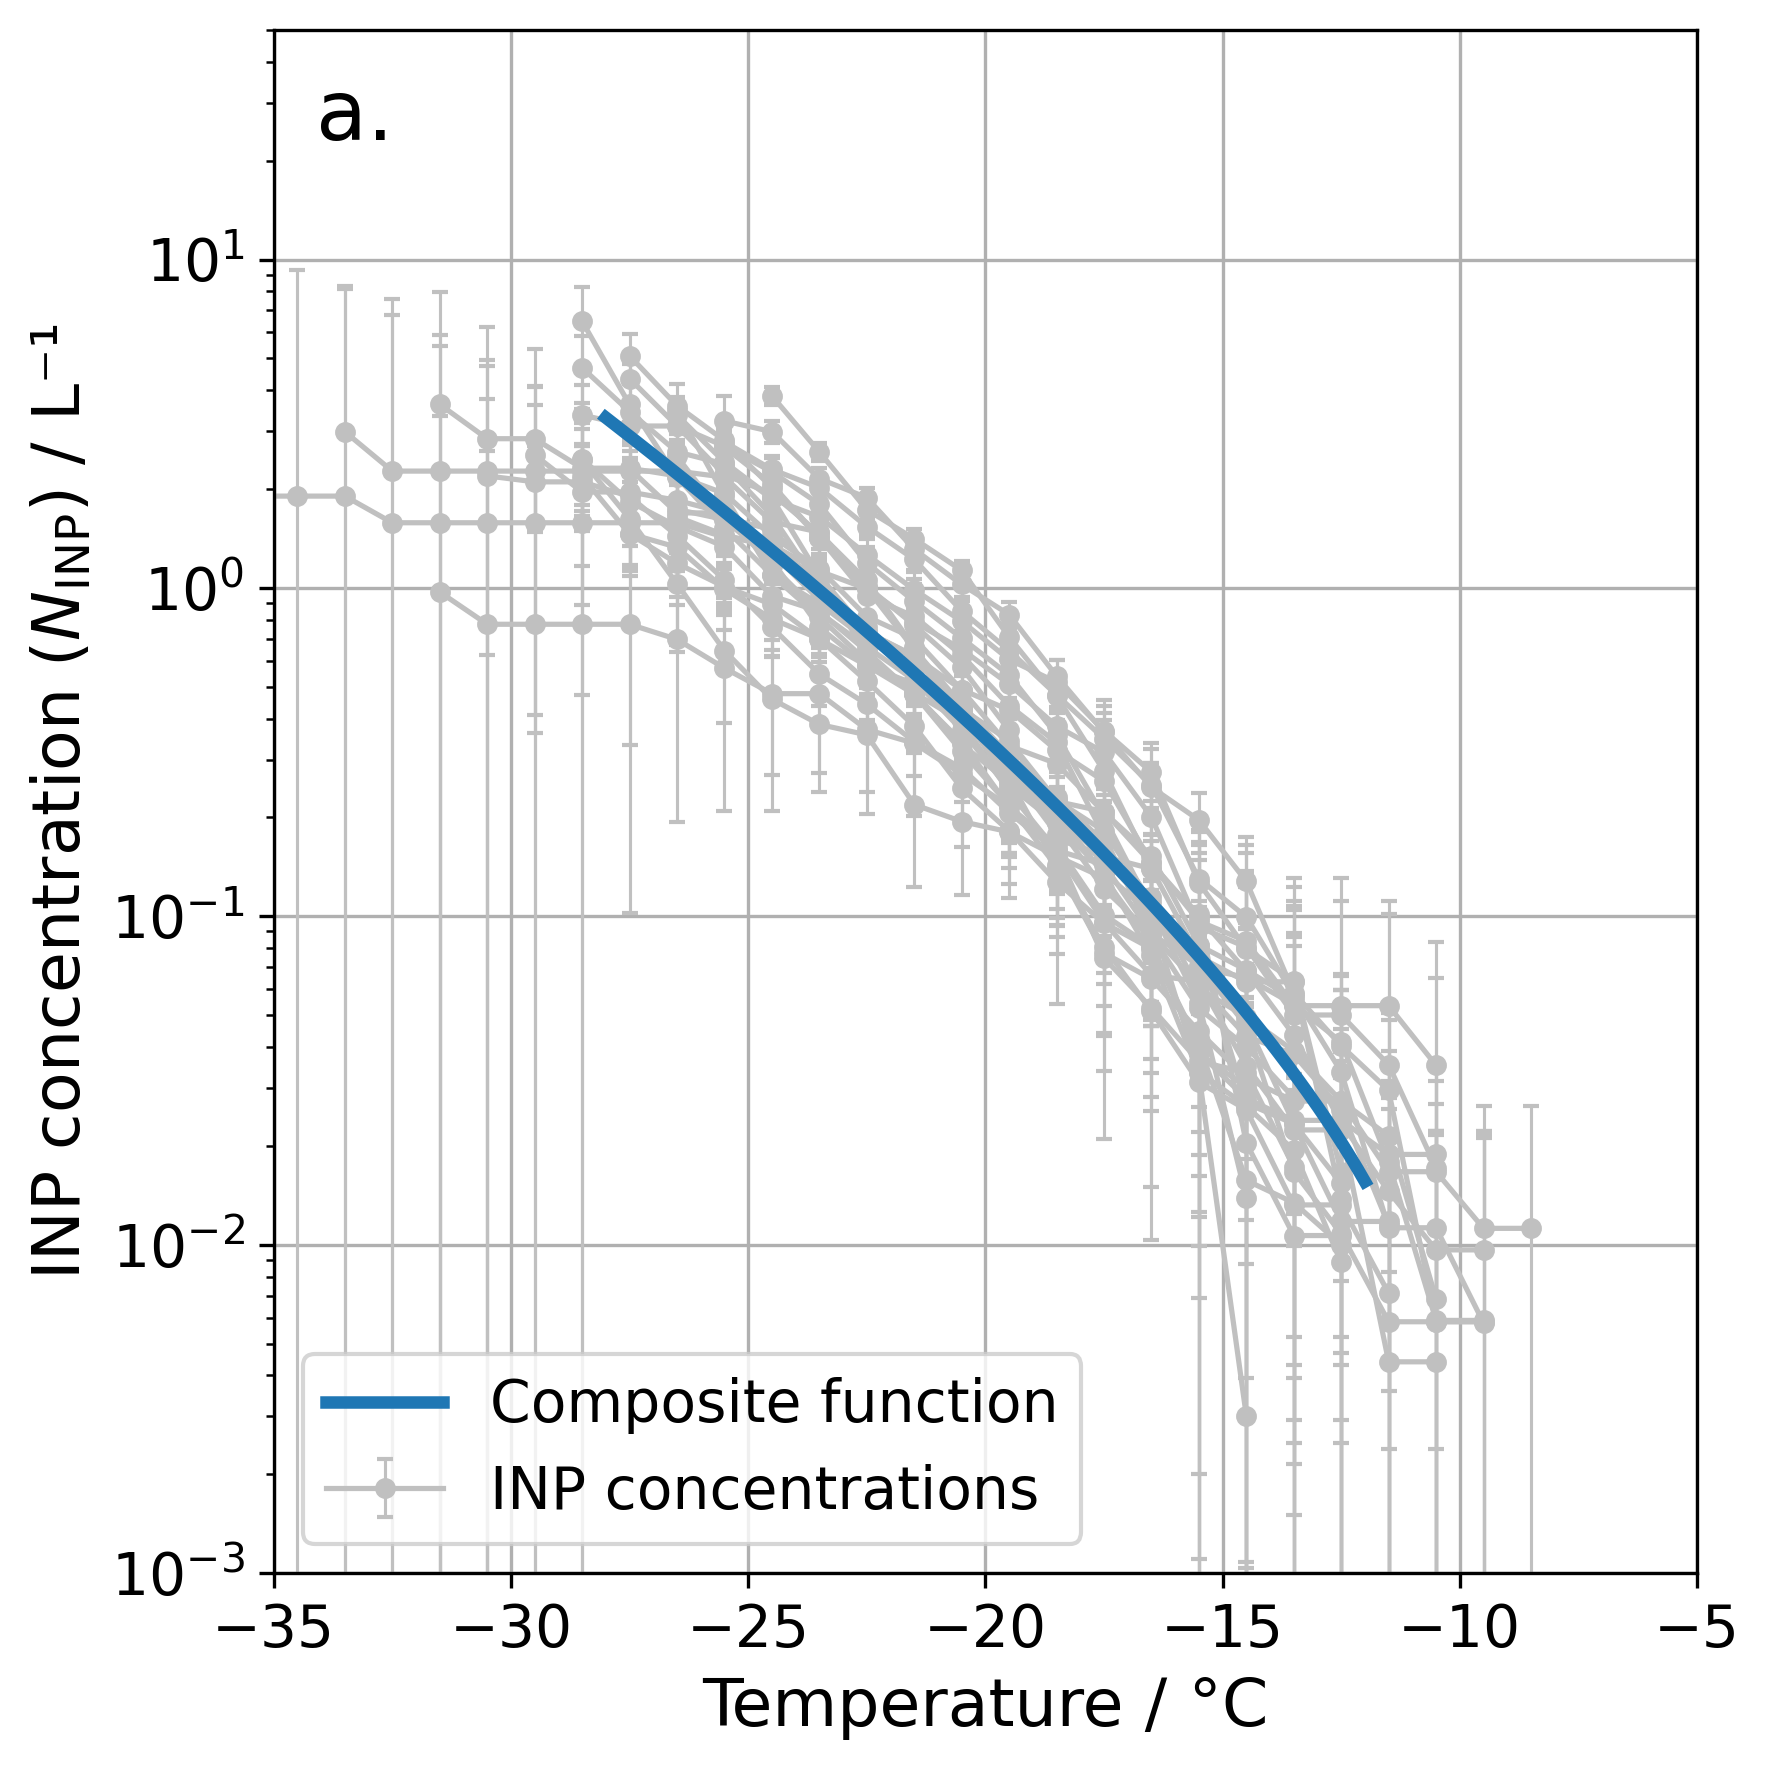

In [9]:
fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(6,6),dpi=300,facecolor='white')
ax.set_xlim(-35,-5)
ax.set_ylim(0.001,50)
ax.set_yscale('log')
ax.grid(zorder=1)
ax.set_xlabel('Temperature / °C', size=16)
ax.tick_params(axis='x', labelsize=14) 
ax.tick_params(axis='y', labelsize=14)
ax.set_ylabel(r'INP concentration ($N_\mathrm{INP}$) / L⁻¹', size=16)
# Loop through concentrations and ensure that there is a different style for
# each of the filter measurements.
first = True
T = np.linspace(-12,-28,1000)
pred = np.exp(four_param_fit(T, -4.990412,  -11.0, 0.82858,  0.709482)) # no < -28
for col in [col for col in INP_concentrations.columns if col.endswith('NT')]:
    y = INP_concentrations[col]
    y_err = INP_concentrations[col[:-2] + 'err']
    if first == True:
        first = False
        ax.errorbar(y.dropna().index, y.dropna(), y_err.dropna(), marker='o',
                    linestyle='-', markersize=4, capsize=2, elinewidth=0.75,
                    linewidth=1.25, color='silver',
                    label = 'INP concentrations'
                   )
    else:
        ax.errorbar(y.dropna().index, y.dropna(), y_err.dropna(), marker='o',
            linestyle='-', markersize=4, capsize=2, elinewidth=0.75,
            linewidth=1.25, color='silver',zorder=2
           )
ax.plot(T,pred,zorder=3,linewidth=3, label='Composite function')
left_legend = ax.legend(loc='lower left', fontsize=14)

ax.text(0.03, 0.97, 'a.', ha='left', va='top', fontsize=20,
           transform=ax.transAxes)

fig.tight_layout()
# fig.savefig('your_location.png')
